가위바위보 이미지를 통해서 분류기 만들기

실험 목표 : 내가 만든 가위바위보 사진을 학습해, 가위바위보를 분류할수있는 모델을 만들어보자


데이터

훈련 데이터
- 웹캠을 통해 직접찍은 왼손 가위바위보 사진 300장
- 해상도224X224로 resize, 이후 표준화 /225

테스트 데이터

웹캠을 통해 직접찍은 오른손 가위바위보 사진 300장

In [3]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [3]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [4]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [5]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


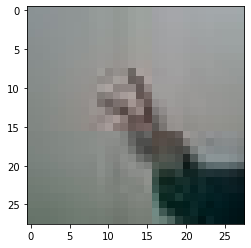

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

가위인거같기도한 사진이네요.,.

In [7]:
#딥러닝 네트워크 설계하기
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [8]:
#딥러닝 네트워크 학습시키기
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
10/10 [==============================] - 1s 23ms/step - loss: 18.2482 - accuracy: 0.3500
Epoch 2/10
10/10 [==============================] - 0s 25ms/step - loss: 2.2242 - accuracy: 0.6933
Epoch 3/10
10/10 [==============================] - 0s 20ms/step - loss: 0.4556 - accuracy: 0.8733
Epoch 4/10
10/10 [==============================] - 0s 21ms/step - loss: 0.1525 - accuracy: 0.9467
Epoch 5/10
10/10 [==============================] - 0s 21ms/step - loss: 0.1064 - accuracy: 0.9700
Epoch 6/10
10/10 [==============================] - 0s 20ms/step - loss: 0.0849 - accuracy: 0.9700
Epoch 7/10
10/10 [==============================] - 0s 21ms/step - loss: 0.0392 - accuracy: 0.9833
Epoch 8/10
10/10 [==============================] - 0s 21ms/step - loss: 0.0132 - accuracy: 0.9967
Epoch 9/10
10/10 [==============================] - 0s 21ms/step - loss: 0.0065 - accuracy: 0.9967
Epoch 10/10
10/10 [==============================] - 0s 21ms/step - loss: 0.0037 - accuracy: 1.0000


테스트 진행 !!
진희님 데이터셋으로 테스트 진행

In [12]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


결과

In [13]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 5.9223 - accuracy: 0.3967
test_loss: 5.922262191772461 
test_accuracy: 0.39666667580604553


정확도가 0.3966... 너무 낮아서 

낮은 해상도(28x28)를 높은 해상도(128x128)로 늘려서 진행

해상도 변경!! 28x28 -> 128x128

In [14]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 128x128 사이즈로 바꾸어 저장합니다. <- 해상도 변경 
	target_size=(128,128)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [15]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 128x128 사이즈로 바꾸어 저장합니다. <- 해상도 변경 
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [16]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 128x128 사이즈로 바꾸어 저장합니다. <- 해상도 변경 
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [18]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=128
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 128, 128, 3)
y_train shape: (300,)


라벨:  0


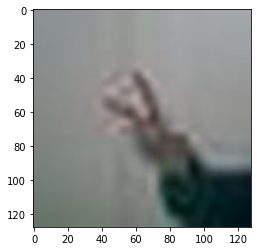

In [19]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

기존 가위보다 나름 개선된 가위.. 그래도 아쉬움, 해상도 더 늘려도 괜찮을것 같습니다

하이퍼파라미터 조정

    1) 높은 해상도에 맞추어 채널 늘리기
    2) epoch 값 증가
    3) Dropout 추가 → 과적합 방지

In [26]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

In [29]:
#딥러닝 네트워크 설계하기
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 높은 해상도에 따라 채널 늘리기 (기존: 16, 32)
n_channel_1 = 32
n_channel_2 = 64
n_channel_3 = 128  

n_dense=32
# epoch 값 증가
n_train_epoch=15



# 데이터 증강(Data Augmentation) 적용

model = keras.models.Sequential([
    keras.layers.Input(shape=(128,128,3)),

    data_augmentation,

    keras.layers.Conv2D(32, (3,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(64, (3,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(128, (3,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3), # Dropout 추가 → 과적합 방지

    keras.layers.Dense(3, activation='softmax')
])



model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 64, 64)       

In [30]:
# ===============================
# 4. 모델 컴파일
# ===============================
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   # y_train = 정수 라벨일 때
    metrics=['accuracy']
)


# ===============================
# 5. 모델 학습
# ===============================
history = model.fit(
    x_train, y_train,
    epochs=n_train_epoch,
    validation_split=0.2        # 검증 정확도 보려고 추가 (강력 추천)
)

Epoch 1/15
8/8 [==============================] - 19s 2s/step - loss: 11.7956 - accuracy: 0.4042 - val_loss: 6.2567 - val_accuracy: 0.0000e+00
Epoch 2/15
8/8 [==============================] - 17s 2s/step - loss: 2.0355 - accuracy: 0.4333 - val_loss: 5.0212 - val_accuracy: 0.0000e+00
Epoch 3/15
8/8 [==============================] - 17s 2s/step - loss: 0.9230 - accuracy: 0.5375 - val_loss: 1.0473 - val_accuracy: 1.0000
Epoch 4/15
8/8 [==============================] - 17s 2s/step - loss: 0.8449 - accuracy: 0.5083 - val_loss: 1.0613 - val_accuracy: 0.9500
Epoch 5/15
8/8 [==============================] - 17s 2s/step - loss: 0.7888 - accuracy: 0.6375 - val_loss: 1.3579 - val_accuracy: 0.0000e+00
Epoch 6/15
8/8 [==============================] - 17s 2s/step - loss: 0.7584 - accuracy: 0.6542 - val_loss: 1.0602 - val_accuracy: 0.9833
Epoch 7/15
8/8 [==============================] - 17s 2s/step - loss: 0.7049 - accuracy: 0.6458 - val_loss: 1.0777 - val_accuracy: 0.7500
Epoch 8/15
8/8 [=====

In [31]:
#테스트!!

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 128, 128, 3)
y_test shape: (300,)


In [32]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 5s - loss: 5.5121 - accuracy: 0.3333
test_loss: 5.512080192565918 
test_accuracy: 0.3333333432674408


기존 test_accuracy: 0.3966

수정후 (2try)   test_accuracy: 0.3333
    
이건 쫌 .. 바로 paper, scissor 사진 다시 찍고 학습, 해상도도 224로 개선

3번째 시도 !!

In [4]:
# 3 try
# paper 부분 사진 재촬영



def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 224x224 사이즈로 바꾸어 저장합니다. <- 해상도 변경 
	target_size=(224,224)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [5]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 224x224 사이즈로 바꾸어 저장합니다. <- 해상도 변경 
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [6]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 224x224 사이즈로 바꾸어 저장합니다. <- 해상도 변경 
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [7]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224  # <- 해상도에 따른 이미지 크기 수정
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 224, 224, 3)
y_train shape: (300,)


라벨:  0


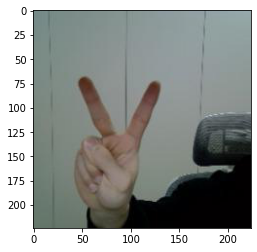

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[10])
print('라벨: ', y_train[10])


편ㅡ안 

사진이 시원하게 잘 보이네요!

이제 정확도가 높게 나오겠죠?

파라미터값은 try2 그대로 진행하겠습니다 

In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:

data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])


In [13]:

#딥러닝 네트워크 설계하기
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 높은 해상도에 따라 채널 늘리기 (기존: 16, 32)
n_channel_1 = 32
n_channel_2 = 64
n_channel_3 = 128  

n_dense=32
# epoch 값 증가
n_train_epoch=15



# 데이터 증강(Data Augmentation) 적용

model = keras.models.Sequential([
    keras.layers.Input(shape=(224,224,3)), #<- shape만 해상도에 맞게 수정

    data_augmentation,

    keras.layers.Conv2D(32, (3,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(64, (3,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(128, (3,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3), # Dropout 추가 → 과적합 방지

    keras.layers.Dense(3, activation='softmax')
])



model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)     

In [14]:
# ===============================
# 4. 모델 컴파일
# ===============================
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   # y_train = 정수 라벨일 때
    metrics=['accuracy']
)


# ===============================
# 5. 모델 학습
# ===============================
history = model.fit(
    x_train, y_train,
    epochs=n_train_epoch,
    validation_split=0.2        # 검증 정확도 보려고 추가 (강력 추천)
)

Epoch 1/15
8/8 [==============================] - 57s 7s/step - loss: 24.5737 - accuracy: 0.5333 - val_loss: 146.2548 - val_accuracy: 0.0000e+00
Epoch 2/15
8/8 [==============================] - 56s 7s/step - loss: 1.4488 - accuracy: 0.7458 - val_loss: 546.1985 - val_accuracy: 0.0000e+00
Epoch 3/15
8/8 [==============================] - 54s 7s/step - loss: 0.5105 - accuracy: 0.7833 - val_loss: 450.8803 - val_accuracy: 0.0000e+00
Epoch 4/15
8/8 [==============================] - 54s 7s/step - loss: 0.3304 - accuracy: 0.8458 - val_loss: 239.4114 - val_accuracy: 0.0000e+00
Epoch 5/15
8/8 [==============================] - 54s 7s/step - loss: 0.2786 - accuracy: 0.8667 - val_loss: 164.7805 - val_accuracy: 0.0000e+00
Epoch 6/15
8/8 [==============================] - 56s 7s/step - loss: 0.2334 - accuracy: 0.8875 - val_loss: 164.4498 - val_accuracy: 0.0000e+00
Epoch 7/15
8/8 [==============================] - 54s 7s/step - loss: 0.1859 - accuracy: 0.8875 - val_loss: 154.4413 - val_accuracy: 0.

확실히 epoch 학습 시간이 길어졌습니다.. 정확도가 나아졌길 바라며 테스트를 해봅니다 ..

In [17]:
#테스트!! 3 TRY

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 224, 224, 3)
y_test shape: (300,)


In [18]:

# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


10/10 - 17s - loss: 22.6257 - accuracy: 0.3333
test_loss: 22.625734329223633 
test_accuracy: 0.3333333432674408


1 TRY    test_accuracy: 0.3966

2 TRY    test_accuracy: 0.3333
  
3 TRY    test_accuracy: 0.3333

줴줴이야 ~
  


파라미터 문제일까요 처음이랑 같은 파라미터값으로 진행해봅니다..

In [19]:
#딥러닝 네트워크 설계하기
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2986016   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [20]:

#딥러닝 네트워크 학습시키기
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
10/10 [==============================] - 16s 2s/step - loss: 1427.3754 - accuracy: 0.3267
Epoch 2/10
10/10 [==============================] - 15s 1s/step - loss: 5.7063 - accuracy: 0.6967
Epoch 3/10
10/10 [==============================] - 15s 1s/step - loss: 0.0772 - accuracy: 0.9933
Epoch 4/10
10/10 [==============================] - 15s 1s/step - loss: 1.6761e-05 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 15s 1s/step - loss: 0.0473 - accuracy: 0.9933
Epoch 6/10
10/10 [==============================] - 15s 1s/step - loss: 2.9008e-08 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 15s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 15s 2s/step - loss: 9.8237e-04 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 15s 1s/step - loss: 4.1098e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 15s 1s/step - loss: 4.4669e-06 - accuracy:

In [21]:
#테스트!! 4 TRY

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 224, 224, 3)
y_test shape: (300,)


In [22]:

# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


10/10 - 5s - loss: 1.0351 - accuracy: 0.5133
test_loss: 1.035146713256836 
test_accuracy: 0.5133333206176758


1 TRY    test_accuracy: 0.3966

2 TRY    test_accuracy: 0.3333
  
3 TRY    test_accuracy: 0.3333

4 TRY    test_accuracy: 0.5133
    
ㅠㅠ 0.5는 넘었네요
  